In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from matplotlib.colors import LogNorm
from matplotlib import rcParams
import copy

from areposnap.gadget import gadget_readsnap
from areposnap.gadget_subfind import load_subfind

from auriga_basics import *
%matplotlib inline

rcParams['font.size'] = 16
rcParams['lines.linewidth'] = 1.5
rcParams['axes.linewidth'] = 1.5
rcParams['ytick.major.width'] = 1.5
rcParams['xtick.major.width'] = 1.5
rcParams['image.cmap'] = 'magma'

cmap = copy.copy(plt.cm.get_cmap(rcParams['image.cmap']))
cmap.set_bad((0,0,0))

In [2]:
machine = 'mac'
#machine = 'magny'
machine = 'virgo'

if machine == 'magny':
    basedir = "/hits/universe/GigaGalaxy/level4_MHD/"
    filedir = "/home/extmilan/masterthesis/files/"
    plotdir = "/home/extmilan/masterthesis/plots/"
elif machine == 'mac': 
    basedir = "/Users/smilanov/Desktop/Auriga/level4/"
    filedir = "/Users/smilanov/Documents/masterthesis/auriga_files/files/"
    plotdir = "/Users/smilanov/Documents/masterthesis/auriga_files/plots/"
elif machine == 'virgo': 
    basedir = "/virgo/simulations/Auriga/level4_MHD/"
    filedir = "/u/milas/masterthesis/masterproject/files/"
    plotdir = "/u/milas/masterthesis/masterproject/plots/"


In [3]:
#### path = /hits/universe/GigaGalaxy/level4_MHD/halo_24/output/*
level = 4

j = 0
for halo_number in [24]:  # range(1, 31):
    halodir = basedir+"halo_{0}/".format(halo_number)
    snappath = halodir+"output/"
    for snapnr in range(127,128,1):
        print("level   : {0}".format(level))
        print("halo    : {0}".format(halo_number))
        print("snapnr  : {0}".format(snapnr))
        print("basedir : {0}".format(basedir))
        print("halodir : {0}".format(halodir))
        print("snappath: {0}\n".format(snappath))
        s, sf = eat_snap_and_fof(level, halo_number, snapnr, snappath, loadonlytype=[1,2,3,4], 
            haloid=0, galradfac=0.1, verbose=True) 

        # Clean negative and zero values of gmet to avoid RuntimeErrors
        # later on (e.g. dividing by zero)
        s.data['gmet'] = np.maximum( s.data['gmet'], 1e-40 )
     

level   : 4
halo    : 24
snapnr  : 127
basedir : /virgo/simulations/Auriga/level4_MHD/
halodir : /virgo/simulations/Auriga/level4_MHD/halo_24/
snappath: /virgo/simulations/Auriga/level4_MHD/halo_24/output/

Found 1783163 stars.
Rotated pos.
Rotated vel.

galrad  : 0.02408556640148163
redshift: 2.220446049250313e-16
time    : 0.9999999999999998
center  : [ 0.  0.  0.]



In [4]:
i_dm = np.where(s.type == 1)

In [5]:
i_stars = np.where(s.type == 4)

In [6]:
1000* np.max(s.pos[i_stars])

43582.151678026035

In [7]:
print(np.sum(i_stars), np.sum(i_dm))

200800297396160 559697017410531


In [8]:
s.cosmology_get_lookback_time_from_a( s.time, is_flat=True )

2.5673723560210484e-15

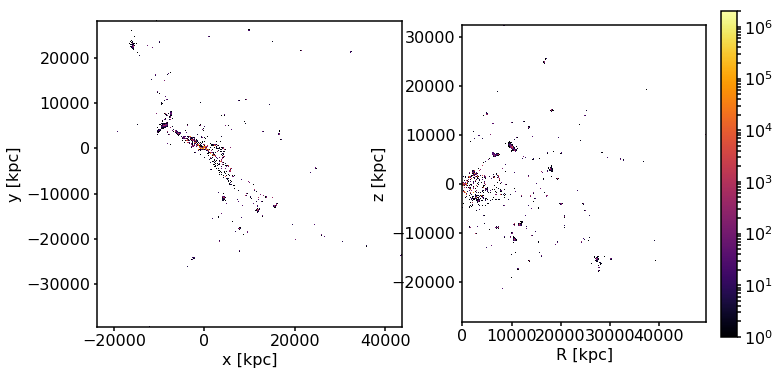

In [9]:
### plot all stars in Simulation 24
istars, = np.where( (s.type == 4) )#& (s.halo == 0) )#& (s.subhalo == 0))
(x, y, z), (vx, vy, vz), rxyz, rxy = get_cartesian_vectors(s, sf, istars)

binnum = 401
H1, xedges1, yedges1 = np.histogram2d(x, y, bins=binnum)
H2, xedges2, yedges2 = np.histogram2d(rxy, z, bins=binnum)
vmin = 1e0
if np.max(H1) > np.max(H2):
    vmax = np.max(H1)
else: vmax = np.max(H2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
h1 = ax1.hist2d(x, y, bins=binnum, norm=matplotlib.colors.LogNorm(), cmap = 'inferno', vmin = vmin, vmax = vmax)
h2 = ax2.hist2d(rxy, z, bins=binnum, norm=matplotlib.colors.LogNorm(), cmap = 'inferno', vmin = vmin, vmax= vmax)
ax1.set_xlabel("x [kpc]")
ax1.set_ylabel("y [kpc]")
ax1.set_aspect('equal')
ax2.set_xlabel("R [kpc]")
ax2.set_ylabel("z [kpc]")
ax2.set_aspect('equal')
cbar2 = fig.colorbar(h2[3], ax = ax2 )


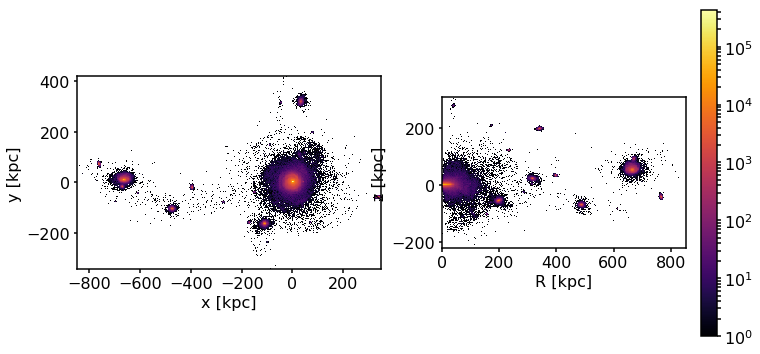

In [10]:
### plot stars of halo 0 in Simulation 24

istars, = np.where( (s.type == 4) & (s.halo == 0) )#& (s.subhalo == 0))
(x, y, z), (vx, vy, vz), rxyz, rxy = get_cartesian_vectors(s, sf, istars)

binnum = 401
H1, xedges1, yedges1 = np.histogram2d(x, y, bins=binnum)
H2, xedges2, yedges2 = np.histogram2d(rxy, z, bins=binnum)
vmin = 1e0
if np.max(H1) > np.max(H2):
    vmax = np.max(H1)
else: vmax = np.max(H2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
h1 = ax1.hist2d(x, y, bins=binnum, norm=matplotlib.colors.LogNorm(), cmap = 'inferno', vmin = vmin, vmax = vmax)
h2 = ax2.hist2d(rxy, z, bins=binnum, norm=matplotlib.colors.LogNorm(), cmap = 'inferno', vmin = vmin, vmax= vmax)
ax1.set_xlabel("x [kpc]")
ax1.set_ylabel("y [kpc]")
ax1.set_aspect('equal')
ax2.set_xlabel("R [kpc]")
ax2.set_ylabel("z [kpc]")
ax2.set_aspect('equal')
cbar2 = fig.colorbar(h2[3], ax = ax2 )


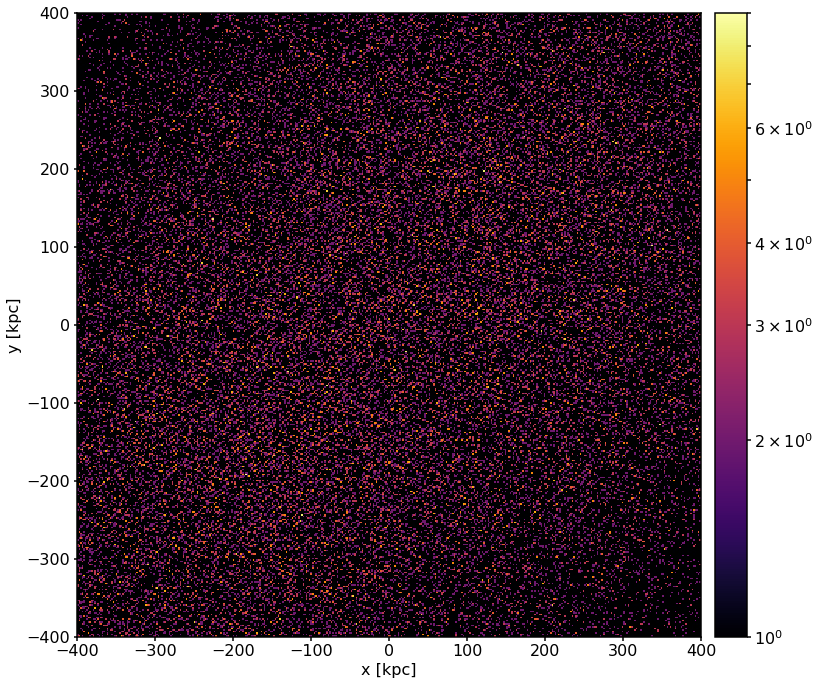

In [11]:
### plot stars of halo 0 within 400kpc in Simulation 24

istars, = np.where( (s.type == 4) & (s.halo == 0) )#& (s.subhalo == 0))
(x, y, z), (vx, vy, vz), rxyz, rxy = get_cartesian_vectors(s, sf, istars)

binnumxx = 401
cmap = copy.copy(plt.cm.inferno)
cmap.set_bad((0,0,0))  # Fill background with black

fig, ax = plt.subplots(1, 1, figsize=(12, 12))
h = ax.hist2d(1000*x, 1000*y, bins=binnumxx, norm=matplotlib.colors.LogNorm(), cmap = cmap, \
           range = [[-400,400], [-400, 400]])
ax.set_xlabel("x [kpc]")
ax.set_ylabel("y [kpc]")
ax.set_aspect('equal')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
fig.colorbar(h[3], cax=cax)
#fig.savefig('../plots/aur_24_xy_distribution.png', dpi = 300, format = 'png', bbox_inches = 'tight')


In [12]:
def read_snap(snapnr, halo_number = 24):
    halodir = basedir+"halo_{0}/".format(halo_number)
    snappath = halodir+"output/"
    
    #print("level   : {0}".format(level))
    #print("halo    : {0}".format(halo_number))
    print("snapnr  : {0}".format(snapnr))
    #print("basedir : {0}".format(basedir))
    #print("halodir : {0}".format(halodir))
    #print("snappath: {0}\n".format(snappath))
    s, sf = eat_snap_and_fof(level, halo_number, snapnr, snappath, loadonlytype=[4], 
        haloid=0, galradfac=0.1, verbose=True) 

    # Clean negative and zero values of gmet to avoid RuntimeErrors
    # later on (e.g. dividing by zero)
    s.data['gmet'] = np.maximum( s.data['gmet'], 1e-40 )


    istars, = np.where( (s.type == 4) & (s.halo == 0) )#& (s.subhalo == 0))
    (x, y, z), (vx, vy, vz), rxyz, rxy = get_cartesian_vectors(s, sf, istars)
    snap_time = s.cosmology_get_lookback_time_from_a( s.time, is_flat=True )
    return(x, y, z), (vx, vy, vz), rxyz, rxy, snap_time

## find min and max values of x, y, z and R in all snapshots to set frame for animation
get_minmaxvals = True
if get_minmaxvals == True:
    startnr = 60
    endnr = 128
    s_snap = np.arange(startnr,endnr,1)
    xmin, xmax, ymin, ymax, zmin, zmax, Rmin, Rmax = [], [], [], [], [], [], [], []
    for j in range(30):
        print(j)
        xmins, xmaxs, ymins, ymaxs, zmins, zmaxs, Rmins, Rmaxs = np.zeros(len(s_snap)), np.zeros(len(s_snap)), np.zeros(len(s_snap)), np.zeros(len(s_snap)), np.zeros(len(s_snap)), np.zeros(len(s_snap)), np.zeros(len(s_snap)), np.zeros(len(s_snap))

        for i in range(len(s_snap)):
            (x, y, z), (vx, vy, vz), rxyz, rxy, snap_time = read_snap(s_snap[i], j+1)
            xmins[i], xmaxs[i] = np.min(x), np.max(x)
            ymins[i], ymaxs[i] = np.min(y), np.max(y)
            zmins[i], zmaxs[i] = np.min(z), np.max(z)
            Rmins[i], Rmaxs[i] = np.min(rxy), np.max(rxy)

        xmin.append(np.min(xmins)) 
        xmax.append(np.min(xmaxs))                                                                                                      
        ymin.append(np.min(ymins)) 
        ymax.append(np.min(ymaxs))                                                                                                        
        zmin.append(np.min(zmins)) 
        zmax.append(np.min(zmaxs))                                                                                                        
        Rmin.append(np.min(Rmins)) 
        Rmax.append(np.min(Rmaxs))                                                                                                         

    print(xmin, xmax, ymin, ymax, zmin, zmax, Rmin, Rmax)
    halonums = np.arange(1,31,1)
    dataout = ([halonums, np.array(xmin), np.array(xmax), np.array(ymin), np.array(ymax), np.array(zmin), np.array(zmax), np.array(Rmin), np.array(Rmax)])  
    np.savetxt(filedir + 'min_max_vals_for_animation_frame_all_simulations.txt', dataout, header='Halo number\txmin [kpc]\txmax [kpc]\tymin [kpc]\tymax [kpc]\tzmin [kpc]\tzmax [kpc]\tRmin [kpc]\tRmax [kpc]')
    

In [13]:
xmin, xmax, ymin, ymax, zmin, zmax, Rmin, Rmax = -849.114990234, 459.571899414, -816.423339844, 439.729125977, -330.904510498, 318.737487793, 0.0, 863.537353516

snapnr  : 60
Found 84249 stars.
Rotated pos.
Rotated vel.

galrad  : 0.008027402311563491
redshift: 2.1032696525957713
time    : 0.32224076923625916
center  : [ 0.  0.  0.]

[-859.0, 469.0, -826.0, 449.0]
snapnr  : 60
Found 84249 stars.
Rotated pos.
Rotated vel.

galrad  : 0.008027402311563491
redshift: 2.1032696525957713
time    : 0.32224076923625916
center  : [ 0.  0.  0.]



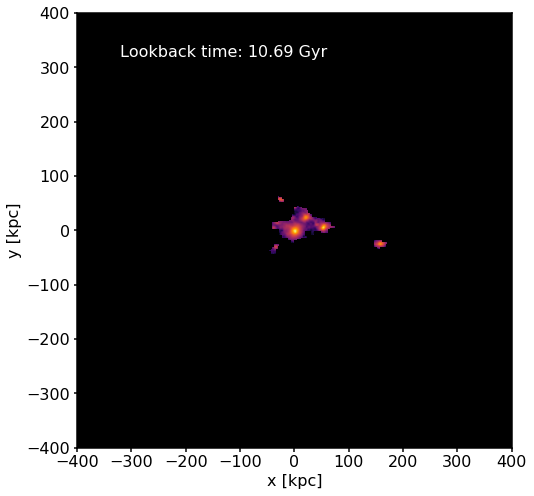

/u/milas/conda-envs/auriga/lib/python3.6/site-packages/matplotlib/animation.py:1021: UserWarning: MovieWriter imagemagick unavailable
  warnings.warn("MovieWriter %s unavailable" % writer)


ValueError: Cannot save animation: no writers are available. Please install ffmpeg to save animations.

In [14]:
startnr = 60
endnr = 128

norm=matplotlib.colors.LogNorm()
s_snap = np.arange(startnr,endnr,1)


xminlim, xmaxlim, yminlim, ymaxlim = int(xmin)-10, int(xmax)+10, int(ymin)-10, int(ymax)+10 
zminlim, zmaxlim, Rminlim, Rmaxlim = int(zmin)-10, int(zmax)+10, int(Rmin)-10, int(Rmax)+10
### for xy plot ###
(x, y, z), (vx, vy, vz), rxyz, rxy, snap_time = read_snap(s_snap[0])
X = x
Y = y
X = np.append(X, [xminlim, xmaxlim])
Y = np.append(Y, [yminlim, ymaxlim])

fig, ax = plt.subplots(figsize = (8,8))
ax.set_ylim([-400, 400])
ax.set_xlim([-400, 400])
#Create 2d Histogram
data,xedges,yedges = np.histogram2d(X,Y, bins = 501)
#data_bg,x_bg,y_bg = np.histogram2d(X_bg,Y_bg, bins = 501)


#Smooth with filter
ext = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
print(ext)
im = plt.imshow(data.T, origin = 'lower', interpolation = 'gaussian', cmap = cmap, norm=norm, extent = ext, animated=True, )
ax.set_xlabel('x [kpc]')
ax.set_ylabel('y [kpc]')
ax.set_aspect('equal')
time_text = ax.text(0.1, 0.9,'', color = 'white', transform=ax.transAxes, fontsize=16)

#Define animation. 
def animate(i) :
    (x, y, z), (vx, vy, vz), rxyz, rxy, snap_time = read_snap(s_snap[i])
    X = x
    Y = y
    X = np.append(X, [xminlim, xmaxlim])
    Y = np.append(Y, [yminlim, ymaxlim])    
    #X = np.append(X, [-201, 201])
    #Y = np.append(Y, [-201, 201])
    data,xedge,yedge = np.histogram2d(X,Y, bins = 501)
    
    im.set_data(data)
    
    time_text.set_text("Lookback time: {:.2f} Gyr".format(snap_time) )
    

anim_xy = animation.FuncAnimation(fig, animate, frames=len(s_snap))

plt.show()

anim_xy.save('../plots/xy_evolution.gif',writer='imagemagick',fps=2)




In [ ]:
print(xmin, xmax, ymin, ymax, zmin, zmax, Rmin, Rmax)

In [ ]:
infile_minmax = filedir + 'min_max_vals_for_animation_frame_all_simulations.txt'
halnum, xmin, xmax, ymin, ymax, zmin, zmax, Rmin, Rmax = np.loadtxt(infile_minmax, unpack = True)
print(halnum)